In [1]:
# 라이브러리 설치
!pip install gdrive_dataset

In [2]:
from gdrivedataset import loader

file_id = "1RDAVsCCQCs1bxjq_2Q6qPlGeztnQ2AMD"
loader.load_from_google_drive(file_id)

========== files ============

data/data



In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
DATA_DIR = 'data/data'

train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
train.drop('id', inplace=True, axis=1)
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
test.drop('id', inplace=True, axis=1)
submission = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))

In [8]:
print(f'train: {train.shape}')
print(f'test: {test.shape}')

train: (1253, 10)
test: (2924, 9)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


In [9]:
train.describe()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [11]:
train.isnull().sum().sort_values(ascending=False)

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [12]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(train)

,Missing values,% Missing
id,0,0.0
Gender,0,0.0
Lenght,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole Weight,0,0.0
Shucked Weight,0,0.0
Viscra Weight,0,0.0
Shell Weight,0,0.0
Target,0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


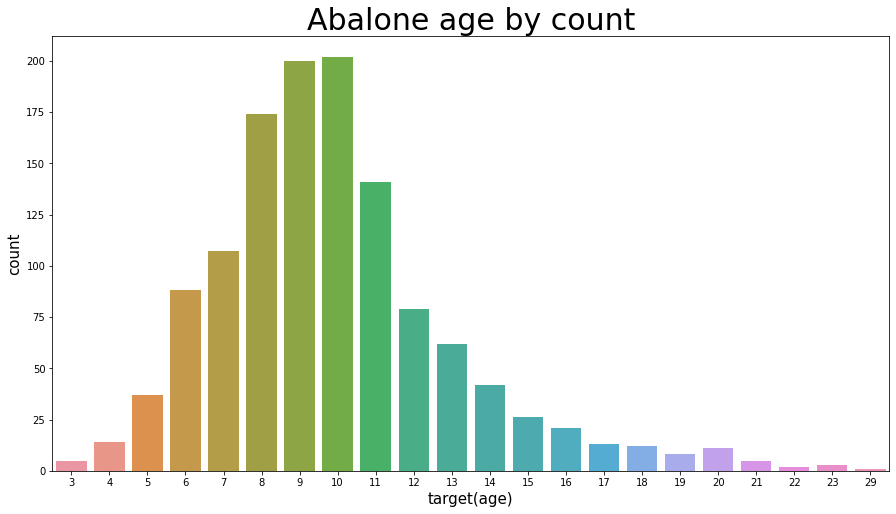

In [36]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot('Target', data=train)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


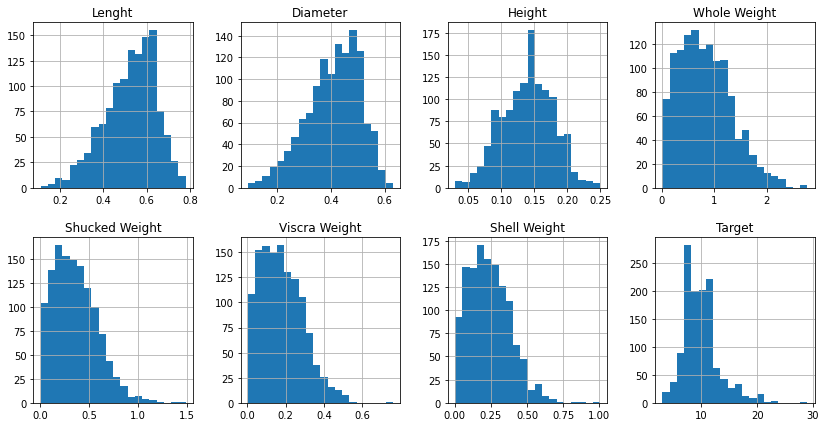

In [48]:
cols_list = train.columns[1:]
print(cols_list)

train[cols_list].hist(figsize=(14,7), grid=True, layout=(2,4), bins=20)
plt.show()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987293,0.901911,0.926321,0.896337,0.903732,0.895664,0.543789
Diameter,0.987293,1.000000,0.908348,0.927205,0.891183,0.901029,0.904546,0.567933
Height,0.901911,0.908348,1.000000,0.895409,0.837456,0.868192,0.902180,0.604654
Whole Weight,0.926321,0.927205,0.895409,1.000000,0.968007,0.966942,0.951652,0.538404
Shucked Weight,0.896337,0.891183,0.837456,0.968007,1.000000,0.932138,0.870453,0.420126
Viscra Weight,0.903732,0.901029,0.868192,0.966942,0.932138,1.000000,0.905061,0.497283
Shell Weight,0.895664,0.904546,0.902180,0.951652,0.870453,0.905061,1.000000,0.625819
Target,0.543789,0.567933,0.604654,0.538404,0.420126,0.497283,0.625819,1.000000


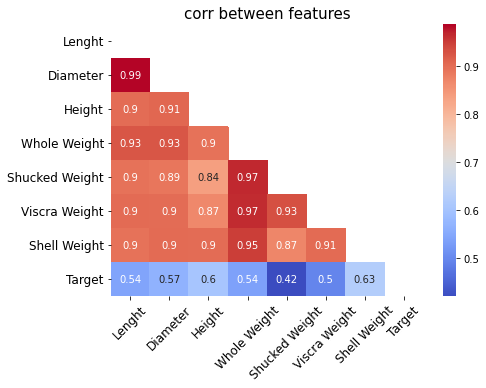

In [32]:
def corr_heat(df):
  plt.figure(figsize=(7, 5))

  corr_df = df.corr()
  display(corr_df)

  mask = np.zeros_like(corr_df)
  mask[np.triu_indices_from(mask)] = 1
  heat_map = sns.heatmap(corr_df, annot=True, mask=mask, cmap='coolwarm')
  heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
  heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
  plt.title('corr between features', fontsize=15)
  plt.show()

corr_heat(train[cols_list])

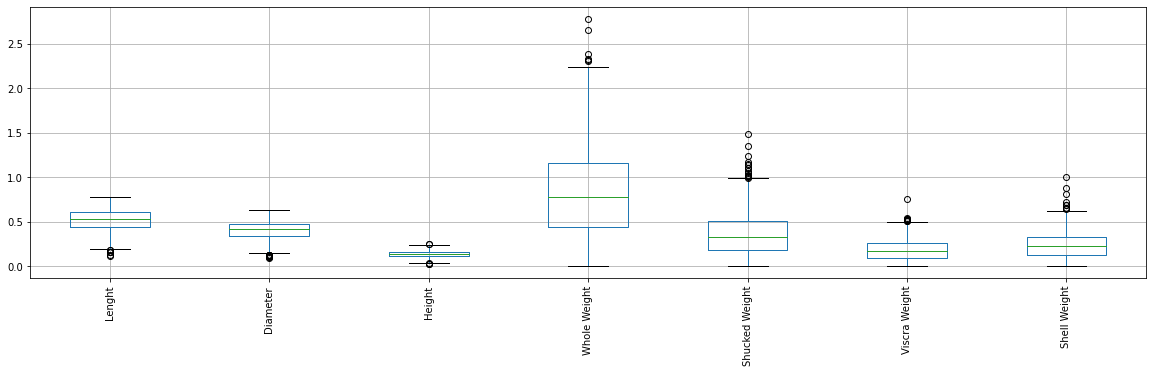

In [37]:
train[cols_list[:-1]].boxplot(rot=90, figsize=(20, 5))

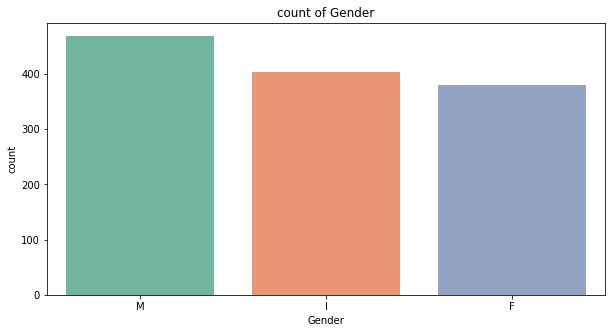

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', data=train, palette='Set2')
plt.title('count of Gender')
plt.show()

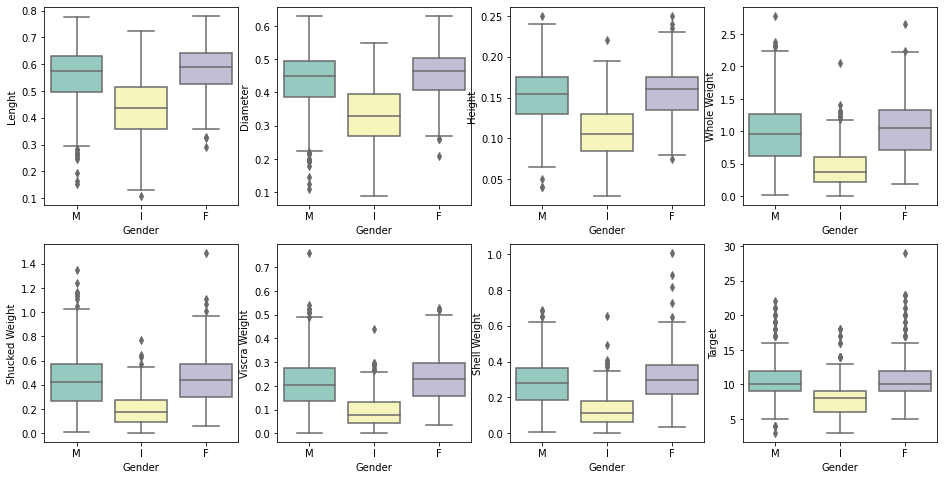

In [49]:
fig = plt.figure(figsize=(16,8))

for i,col in enumerate(cols_list):
  fig.add_subplot(2, 4, i+1)
  sns.boxplot(x='Gender', y=col, data=train, palette='Set3')

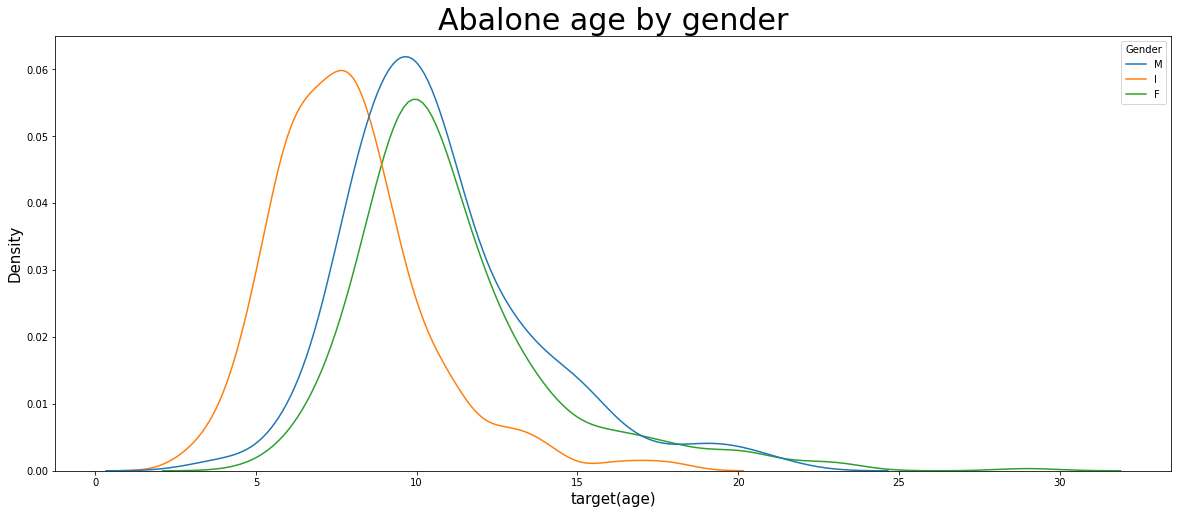

In [53]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

<Figure size 1440x1440 with 0 Axes>

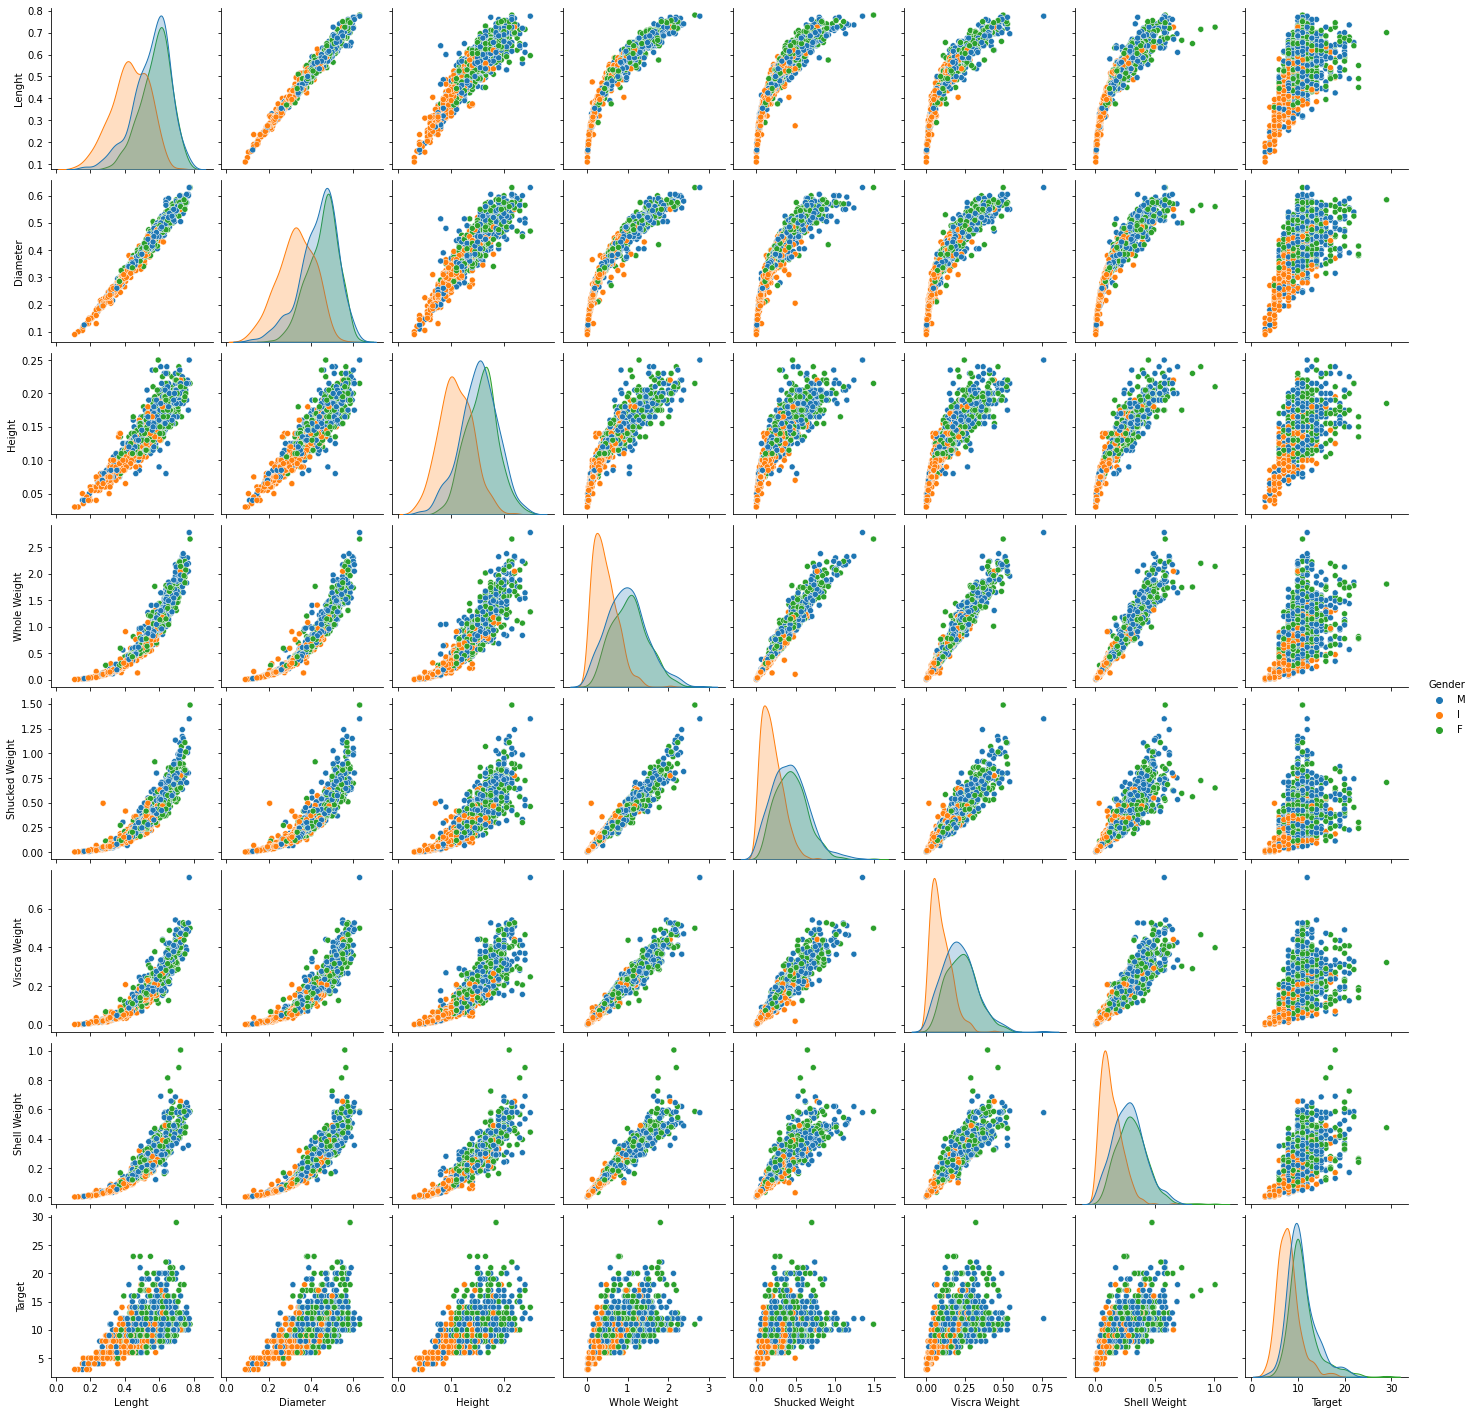

In [55]:
# plt.figure(figsize=(20,20))
sns.pairplot(train[list(cols_list) + ['Gender']], hue='Gender')